In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse

/Users/andreasainz/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def function(x,y):
    return -(x*(x - 1) + y*(1 - y)) + 12*np.cos(x*y) *np.sin(2*x + y)

In [3]:
X_train = np.linspace(-3,3,5000)
Y_train = np.linspace(-3,3,5000)

# Combine X and Y into a feature matrix
XY = np.array([X_train, Y_train]).T  


# Compute function values on the grid
X, Y = np.meshgrid(X_train,Y_train)
f = function(X, Y)

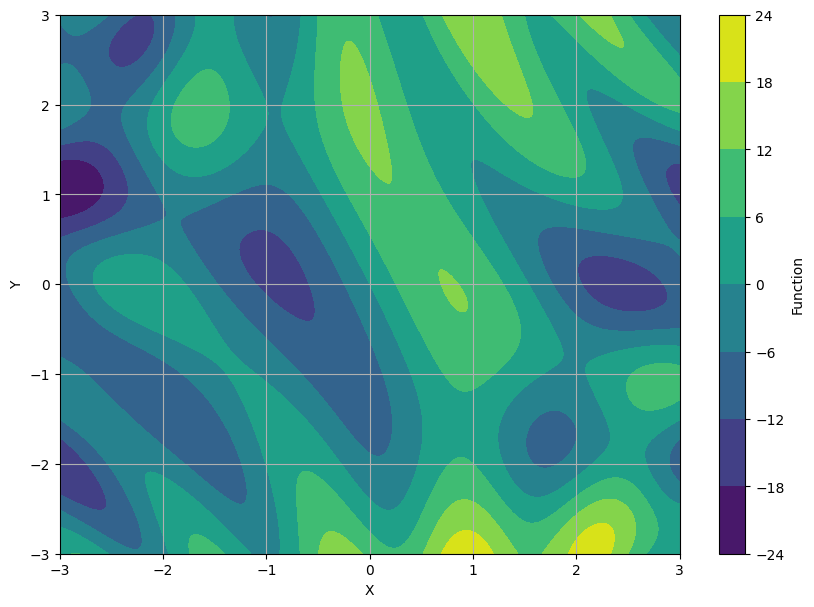

In [4]:
plt.figure(figsize=(10,7))

plt.contourf(X, Y, f, cmap='viridis')
plt.colorbar(label='Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.show()

In [11]:
X_train = np.linspace(-3,3,200)
Y_train = np.linspace(-3,3,200)

X, Y = np.meshgrid(X_train, Y_train)
# Combine X and Y into a feature matrix
#XY = np.array([X_train, Y_train]).T  


# Compute function values on the grid
f = function(X, Y)

data = np.vstack([X.ravel(), Y.ravel()]).T
fdata = f.ravel()
np.shape(data)

(40000, 2)

In [14]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_dim=2),  # First hidden layer
    Dense(64, activation='relu'),               # Second hidden layer
    Dense(1, activation='linear')               # Output layer for regression
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

# Train the model
history = model.fit(data, fdata, epochs=100, batch_size=30, verbose=1)

Epoch 1/100


/Users/andreasainz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1334/1334 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - loss: 35.5995 - mse: 35.5995
Epoch 2/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - loss: 23.4946 - mse: 23.4946
Epoch 3/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 271us/step - loss: 18.8367 - mse: 18.8367
Epoch 4/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - loss: 16.0001 - mse: 16.0001
Epoch 5/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 296us/step - loss: 14.3335 - mse: 14.3335
Epoch 6/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 13.5576 - mse: 13.5576
Epoch 7/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - loss: 12.7837 - mse: 12.7837
Epoch 8/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - loss: 11.5084 - mse: 11.5084
Epoch 9/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 269us/step - loss: 10.6908 - mse: 10.6908
Epoch 10/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - loss: 10.0045 - mse: 10.0045
Epoch 11/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 0s 294us/step - loss: 9.1853 - mse: 9.1853
Epoch 12/100
1334/1334 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 212us/step


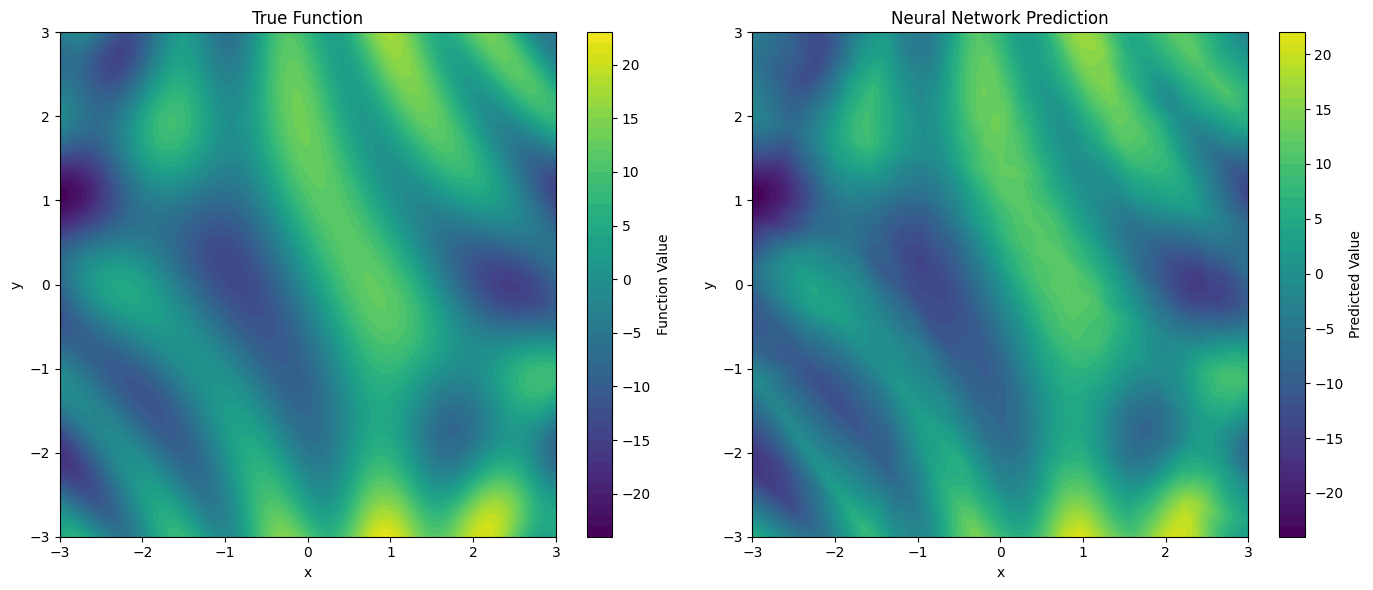

In [16]:
# Generate a grid for visualization
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)

# Compute true and predicted function values
true_values = function(X_grid, Y_grid)
predicted_values = model.predict(np.array([X_grid.ravel(), Y_grid.ravel()]).T).reshape(100, 100)

# Plot the true function
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.contourf(X_grid, Y_grid, true_values, cmap='viridis', vmin=-24,vmax=24 , levels = 50)
plt.colorbar(label='Function Value')
plt.title('True Function')
plt.xlabel('x')
plt.ylabel('y')

# Plot the predicted function
plt.subplot(1, 2, 2)
plt.contourf(X_grid, Y_grid, predicted_values, cmap='viridis', vmin=-24,vmax=24, levels = 50)
plt.colorbar(label='Predicted Value')
plt.title('Neural Network Prediction')
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [17]:
def augment_data(X):
    x, y = X[:, 0], X[:, 1]
    x2 = x ** 2
    xy = x * y
    y2 = y ** 2
    return np.column_stack([x, y, x2, xy, y2])

# Augment the dataset
X_augmented = augment_data(X)

# Build and train the model with augmented data
model_augmented = Sequential([
    Dense(64, activation='relu', input_dim=5),  # Adjust input_dim to 5
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model_augmented.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
history_augmented = model_augmented.fit(X_augmented, f, epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/Users/andreasainz/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step - loss: 59.4748
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 59.2215
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 58.7519
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 59.0676  
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 58.2530
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - loss: 58.7960
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: 58.8248
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 57.4908
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - loss: 57.2875
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 58.2805
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518us/step - loss: 58.4611
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 58.2165
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 58.7988
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 60.1688
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 59.0954
E